In [ ]:
pip install iopath
pip install hydra-core
%pip install pandas numpy opencv-python scikit-learn torch torchvision tqdm matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pathlib import Path
import sys
sys.path.append('/media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/segment-anything-2')
from sam2.build_sam import build_sam2

# Add parent directory to path
parent_dir = Path().cwd().parent
print(parent_dir)
sys.path.append(str(parent_dir))


/media/ps/data/Datasets/300例心脏分割/300例勾画图像


In [2]:
from HeartChambersSAMTrainer import HeartChambersSAMTrainer
from matplotlib import pyplot as plt

Using device: cuda
Using absolute config directory based on model_cfg path: //media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/segment-anything-2/sam2/configs
Searching for data in: /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a2c, /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a3c, /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a4c
Processing view: a2c in /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a2c
Found 605 JSON files in /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a2c
Processing view: a3c in /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a3c


Found 600 JSON files in /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a3c
Processing view: a4c in /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a4c
Found 603 JSON files in /media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset/a4c

Data Preparation Summary:
Total JSON entries: 1808
Total unique patients: 202
Training patients: 161, Testing patients: 41
Training samples: 1409, Testing samples: 399
Training views: {'a2c': 472, 'a3c': 468, 'a4c': 469}
Testing views: {'a2c': 133, 'a3c': 132, 'a4c': 134}
Initializing SAM model for training...
Model loaded successfully onto cuda using build_sam2.
Freezing parameters of image encoder module: 'image_encoder'
Set 'sam_mask_decoder' to training mode.
Set 'sam_prompt_encoder' to training mode.
Number of trainable parameters: 11743362

--- Starting Training (Combined Mask Mode - Single Point Prompt) ---
Total steps: 500


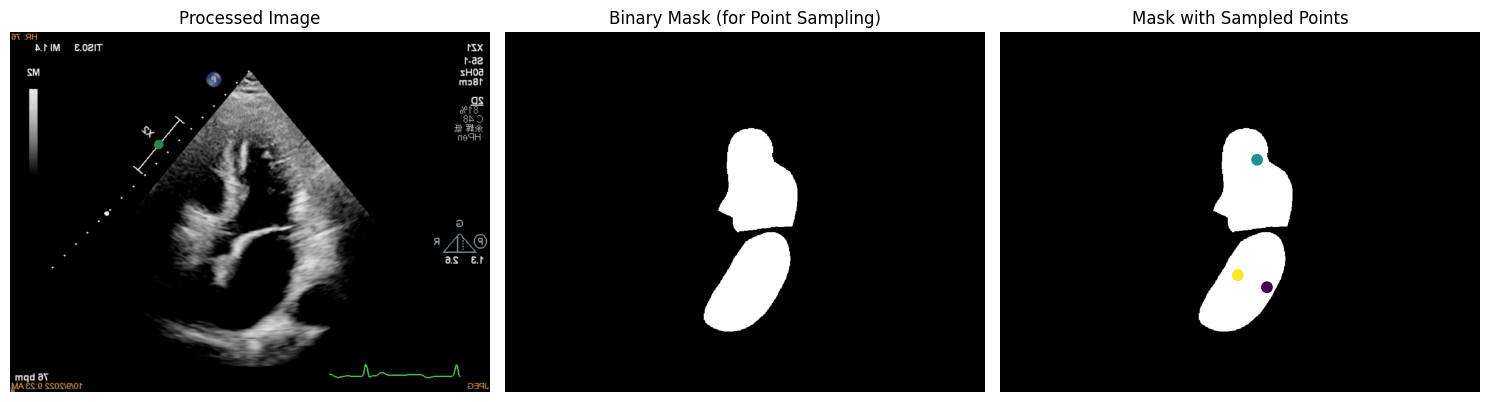

Step 100/500: Train IoU (EMA) = 0.3210, Batch IoU = 0.0398, Loss = 0.4882, LR = 0.000010
Step 200/500: Train IoU (EMA) = 0.3695, Batch IoU = 0.6482, Loss = 0.1743, LR = 0.000010
Step 300/500: Train IoU (EMA) = 0.4165, Batch IoU = 0.7370, Loss = 0.2010, LR = 0.000010
Step 400/500: Train IoU (EMA) = 0.4340, Batch IoU = 0.4907, Loss = 0.1011, LR = 0.000010
Step 500/500: Train IoU (EMA) = 0.4477, Batch IoU = 0.4518, Loss = 0.0920, LR = 0.000010
--- Step 500/500: Validation IoU = 0.4344 ---
Saved best model to ./models/heart_chambers_sam_best.pth

--- Training Completed ---
Best validation IoU: 0.4344
Final model saved: ./models/heart_chambers_sam_final.pth


In [3]:

import os
# 先切换到正确的目录
os.chdir("/media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/segment-anything-2")
# 然后使用相对路径
model_cfg = "sam2/configs/sam2.1/sam2.1_hiera_s.yaml"

trainer = HeartChambersSAMTrainer(
    data_dir="/media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/data/heart_chambers_dataset",
    model_cfg="//media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/segment-anything-2/sam2/configs/sam2.1/sam2.1_hiera_s.yaml",
    checkpoint_path="/media/ps/data/Datasets/300例心脏分割/300例勾画图像/FineTune_SAM2/segment-anything-2/checkpoints/sam2.1_hiera_small.pt"
    )
# Prepare the dataset
trainer.prepare_data(test_size=0.2)

# Initialize the model
trainer.initialize_model()

# Train the model
trainer.train(
    
    steps=500,
    learning_rate=1e-5,  # 降低学习率适应医学图像任务
    weight_decay=2e-4,   # 增加正则化
    checkpoint_interval=500,
    validation_interval=500  # 添加验证间隔
)



--- Starting Training (Multi-Class Sequential Mode) ---

--- Starting Training (Multi-Class Sequential Mode) ---
Classes: ['LA', 'RA', 'LV', 'RV', 'myocardium']
Steps per class: 1000

--- Training Class: LA (ID: 1) ---


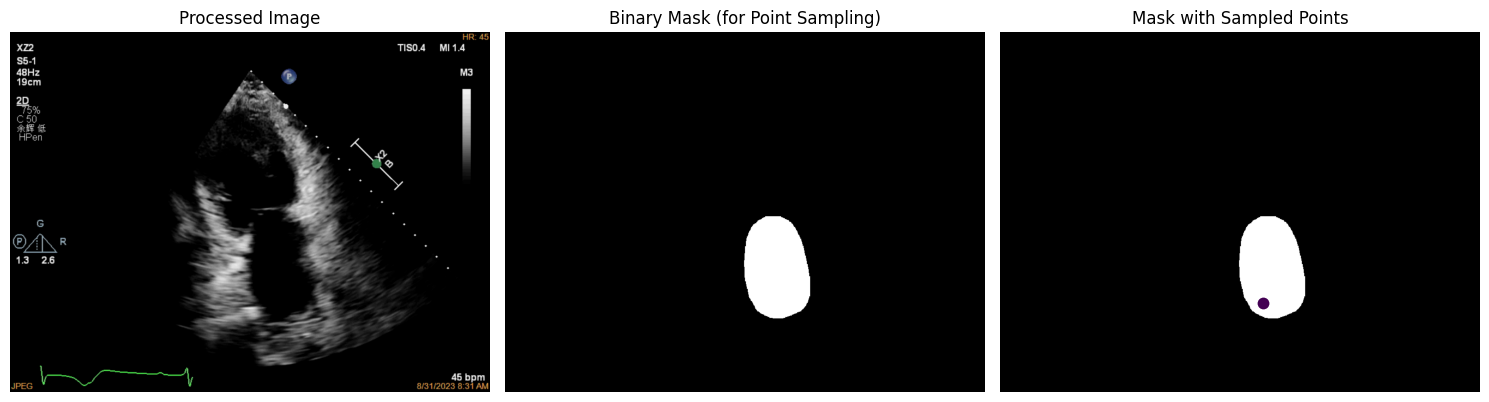

Class LA, Step 100/1000: Train IoU (EMA) = 0.1978, Batch IoU = 0.1937, Loss = 0.0898, LR = 0.000010
Class LA, Step 200/1000: Train IoU (EMA) = 0.2119, Batch IoU = 0.3693, Loss = 0.0791, LR = 0.000010
--- Class LA, Step 200: Validation IoU = 0.1595 ---
Saved new overall best model to ./models/heart_chambers_sam_multiclass_best.pth
Class LA, Step 300/1000: Train IoU (EMA) = 0.2783, Batch IoU = 0.1518, Loss = 0.0953, LR = 0.000010
Class LA, Step 400/1000: Train IoU (EMA) = 0.3956, Batch IoU = 0.6074, Loss = 0.0922, LR = 0.000010
--- Class LA, Step 400: Validation IoU = 0.4603 ---
Saved new overall best model to ./models/heart_chambers_sam_multiclass_best.pth
Class LA, Step 500/1000: Train IoU (EMA) = 0.5203, Batch IoU = 0.5029, Loss = 0.0566, LR = 0.000010
Class LA, Step 600/1000: Train IoU (EMA) = 0.6362, Batch IoU = 0.6518, Loss = 0.0628, LR = 0.000010
--- Class LA, Step 600: Validation IoU = 0.6046 ---
Saved new overall best model to ./models/heart_chambers_sam_multiclass_best.pth
Clas

In [ ]:
# Assume 'trainer' object is initialized and data/model are ready

# --- Configuration for Multi-Class Training ---
STEPS_PER_CLASS = 2000 # 每个类别训练的步数 (例如, 5个类别总共会训练 5*1000=5000 优化器步)
LEARNING_RATE = 1e-5   # 学习率可以保持或调整
WEIGHT_DECAY = 2e-4
ACCUMULATION_STEPS = 8 # 梯度累积步数
SCHEDULER_STEP = 100   # 学习率调度器步长 (基于优化器步数)
SCHEDULER_GAMMA = 0.5
CHECKPOINT_INTERVAL = 200 # 保存检查点的全局优化器步数间隔
VALIDATION_INTERVAL = 200 # 每个类别内部训练多少步进行一次验证
MODEL_NAME_PREFIX = "./models/heart_chambers_sam_multiclass" # 建议使用不同的前缀保存模型
trainer = None # Initialize trainer to None
# --- Call the train_multiclass method ---
try:
    print("\n--- Starting Training (Multi-Class Sequential Mode) ---")
    trainer.train_multiclass(
        steps_per_class=STEPS_PER_CLASS,
        learning_rate=LEARNING_RATE,
        weight_decay=WEIGHT_DECAY,
        accumulation_steps=ACCUMULATION_STEPS,
        scheduler_step_size=SCHEDULER_STEP,
        scheduler_gamma=SCHEDULER_GAMMA,
        checkpoint_interval=CHECKPOINT_INTERVAL, # Checkpoint based on global steps
        validation_interval=VALIDATION_INTERVAL, # Validation based on steps within each class
        model_name_prefix=MODEL_NAME_PREFIX
    )
    print("\n--- Multi-Class Training Finished ---")

except Exception as e:
    print(f"\nAn error occurred during multi-class training: {e}")
    import traceback
    traceback.print_exc()

